link : https://www.kaggle.com/janiobachmann/bank-marketing-dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_colwidth', -1)

In [4]:
# load dataset
dataset = pd.read_csv('data/k_bank.csv')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


no     5873
yes    5289
Name: deposit, dtype: int64

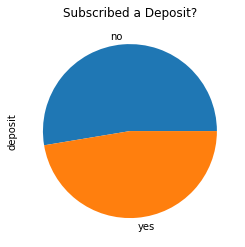

In [108]:
dataset['deposit'].value_counts().plot.pie(title='Subscribed a Deposit?')
dataset['deposit'].value_counts()

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
dataset.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [9]:
# 9 columns with object type
obj_df = dataset.select_dtypes(include='object')
# obj_df.iloc[:5,:-1]
obj_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


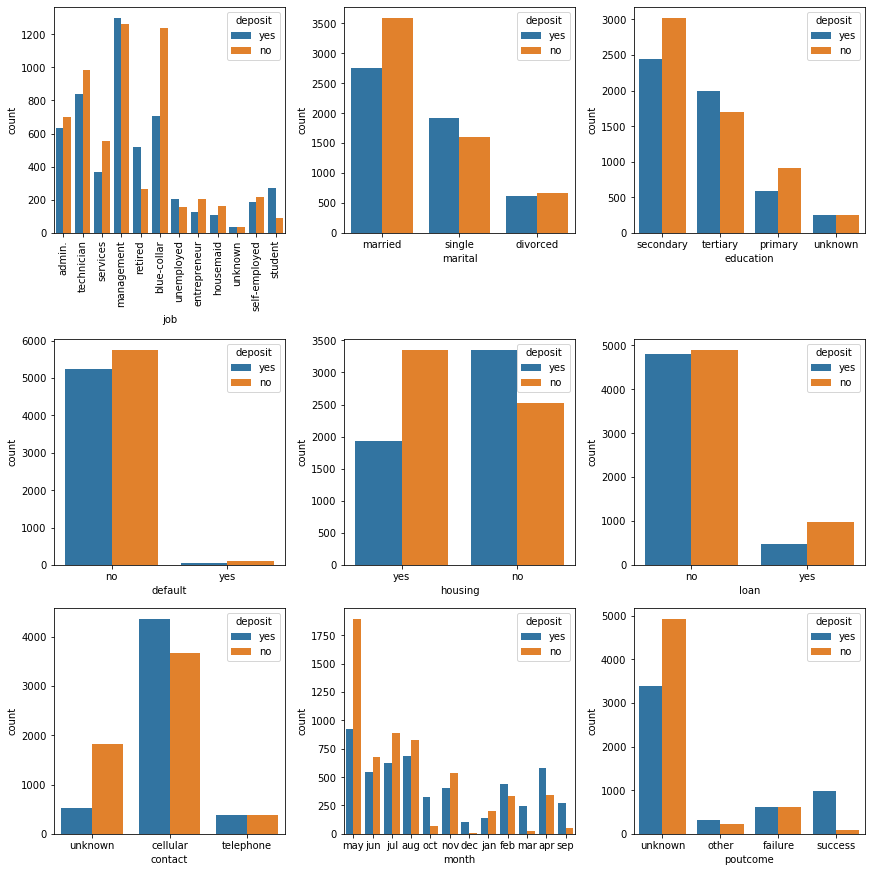

In [10]:
# columns with object type
n = 3
fig, axes = plt.subplots(n, n, figsize=(12,12), constrained_layout=True)

obj_cols = np.array(obj_df.columns[:-1])
col = 0

for i in range(n):
    for j in range(n):
        sns.countplot(ax=axes[i,j], x=obj_cols[col], hue='deposit', data=dataset)
        col += 1

#fig.tight_layout()
#plt.subplots_adjust()
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
plt.show()

In [11]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


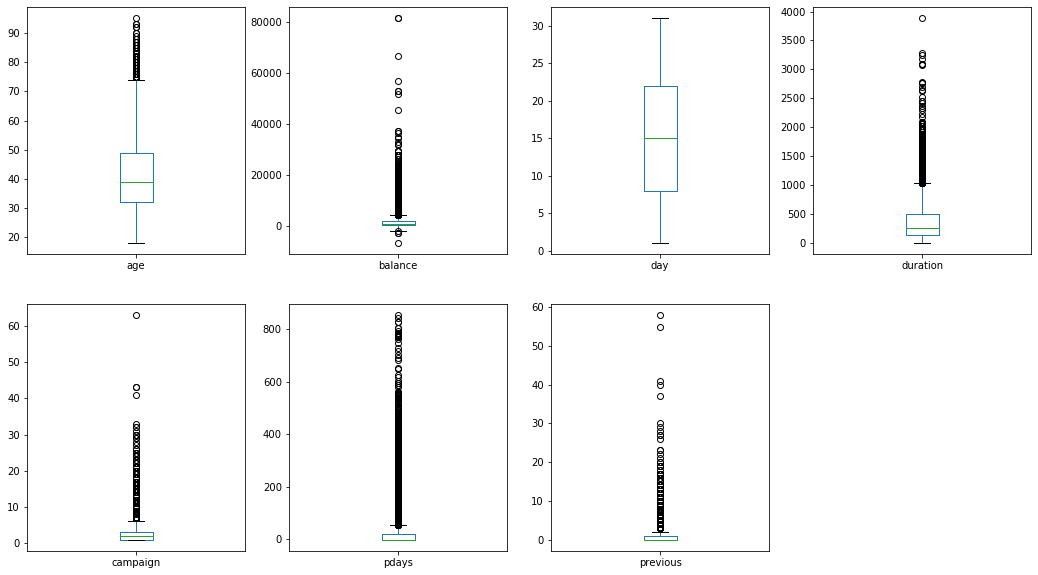

In [12]:
dataset.plot(kind='box', subplots=True, layout=(2,4), figsize=(18,10))
plt.show()

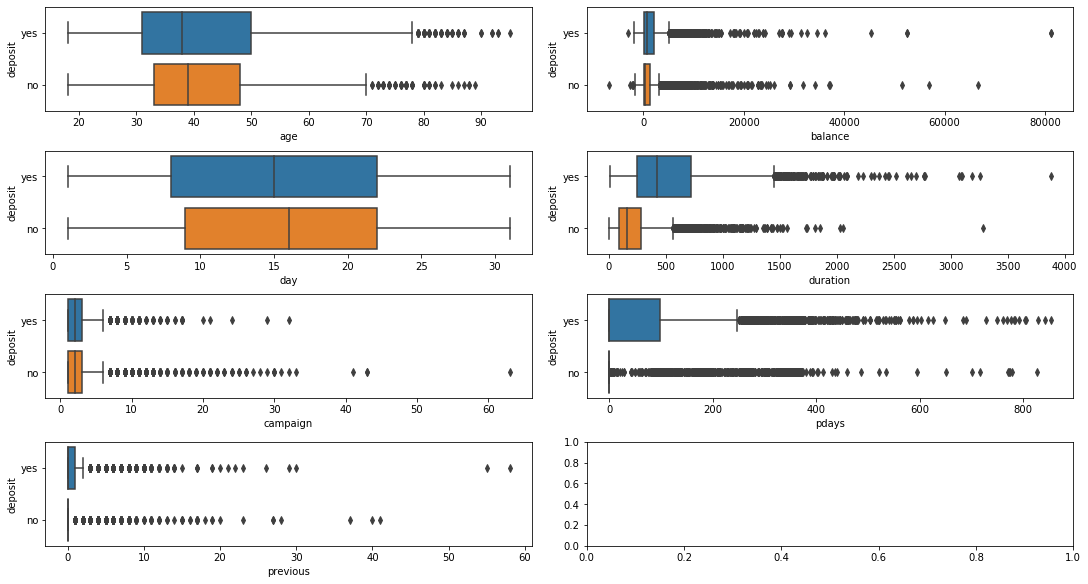

In [14]:
# 7 columns with int64 type
num_cols = np.array(dataset.select_dtypes(exclude='object').columns)

n, m = 4, 2
fig, axes = plt.subplots(n, m, figsize=(15,8), constrained_layout=True)

col = 0

for i in range(n):
    for j in range(m):
        sns.boxplot(ax=axes[i,j], x=num_cols[col], y='deposit', data=dataset)
        col += 1
        if col==7:
            break

plt.show()

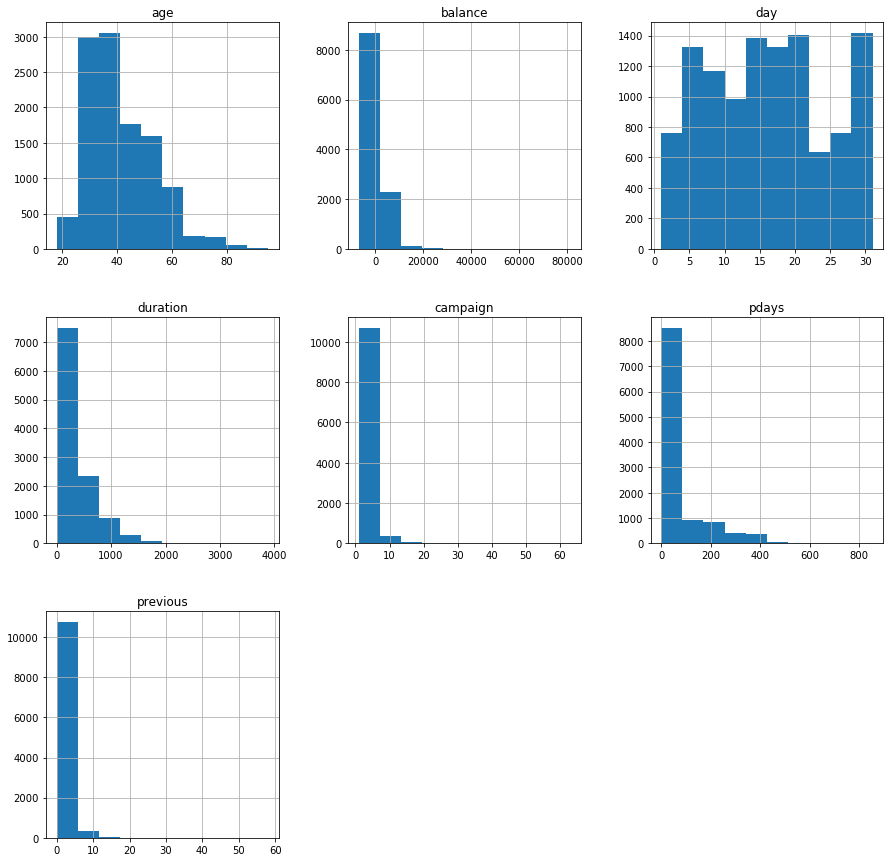

In [178]:
dataset.hist(figsize=(15,15))
plt.show()

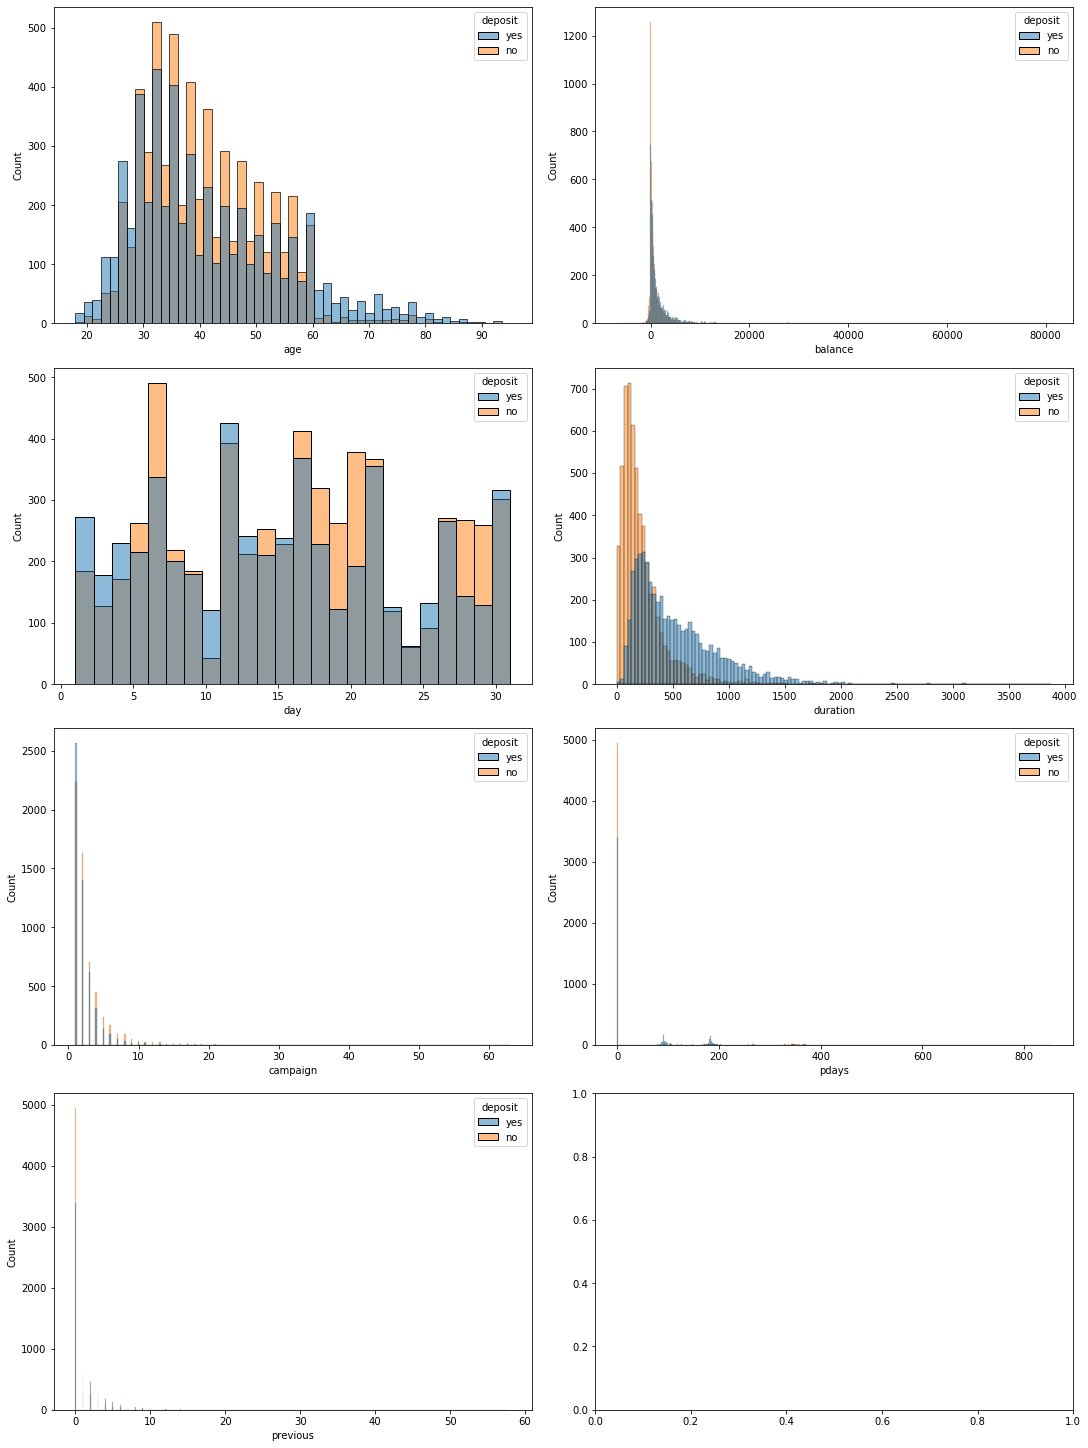

In [16]:
fig, axes = plt.subplots(n, m, figsize=(15,20), constrained_layout=True)

col = 0

for i in range(n):
    for j in range(m):
        sns.histplot(dataset, x=num_cols[col], hue='deposit', ax=axes[i,j], multiple='layer')
        col += 1
        if col==7:
            break
plt.show()

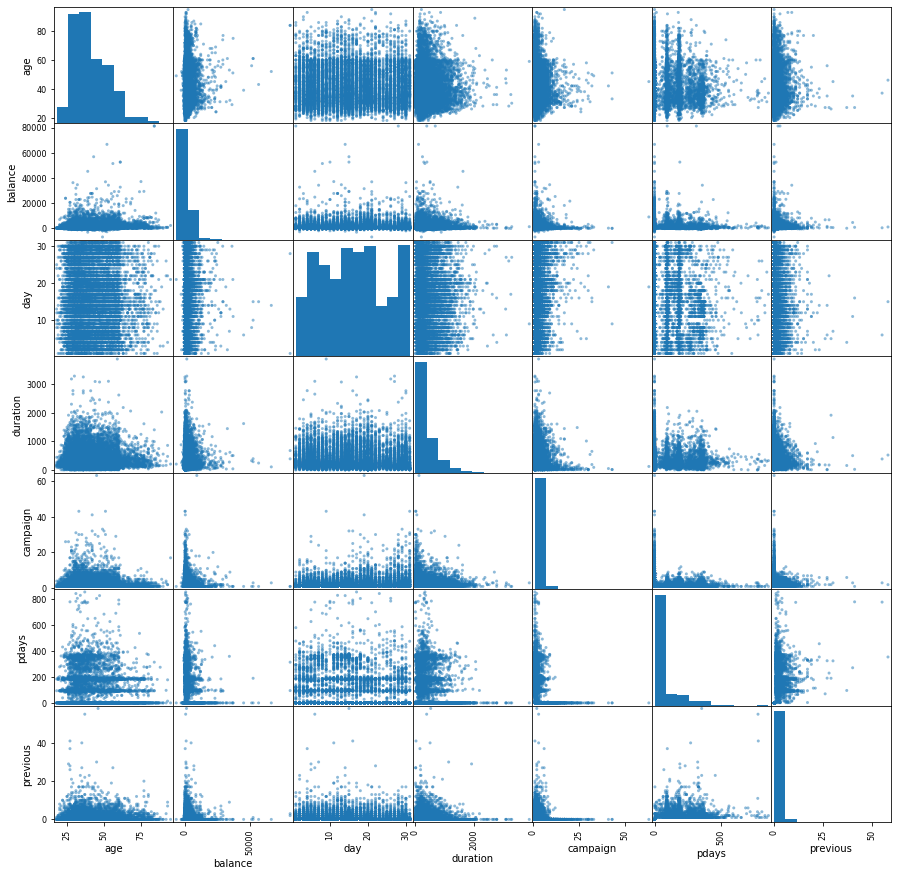

In [17]:
pd.plotting.scatter_matrix(dataset, figsize=(15,15))
plt.show()

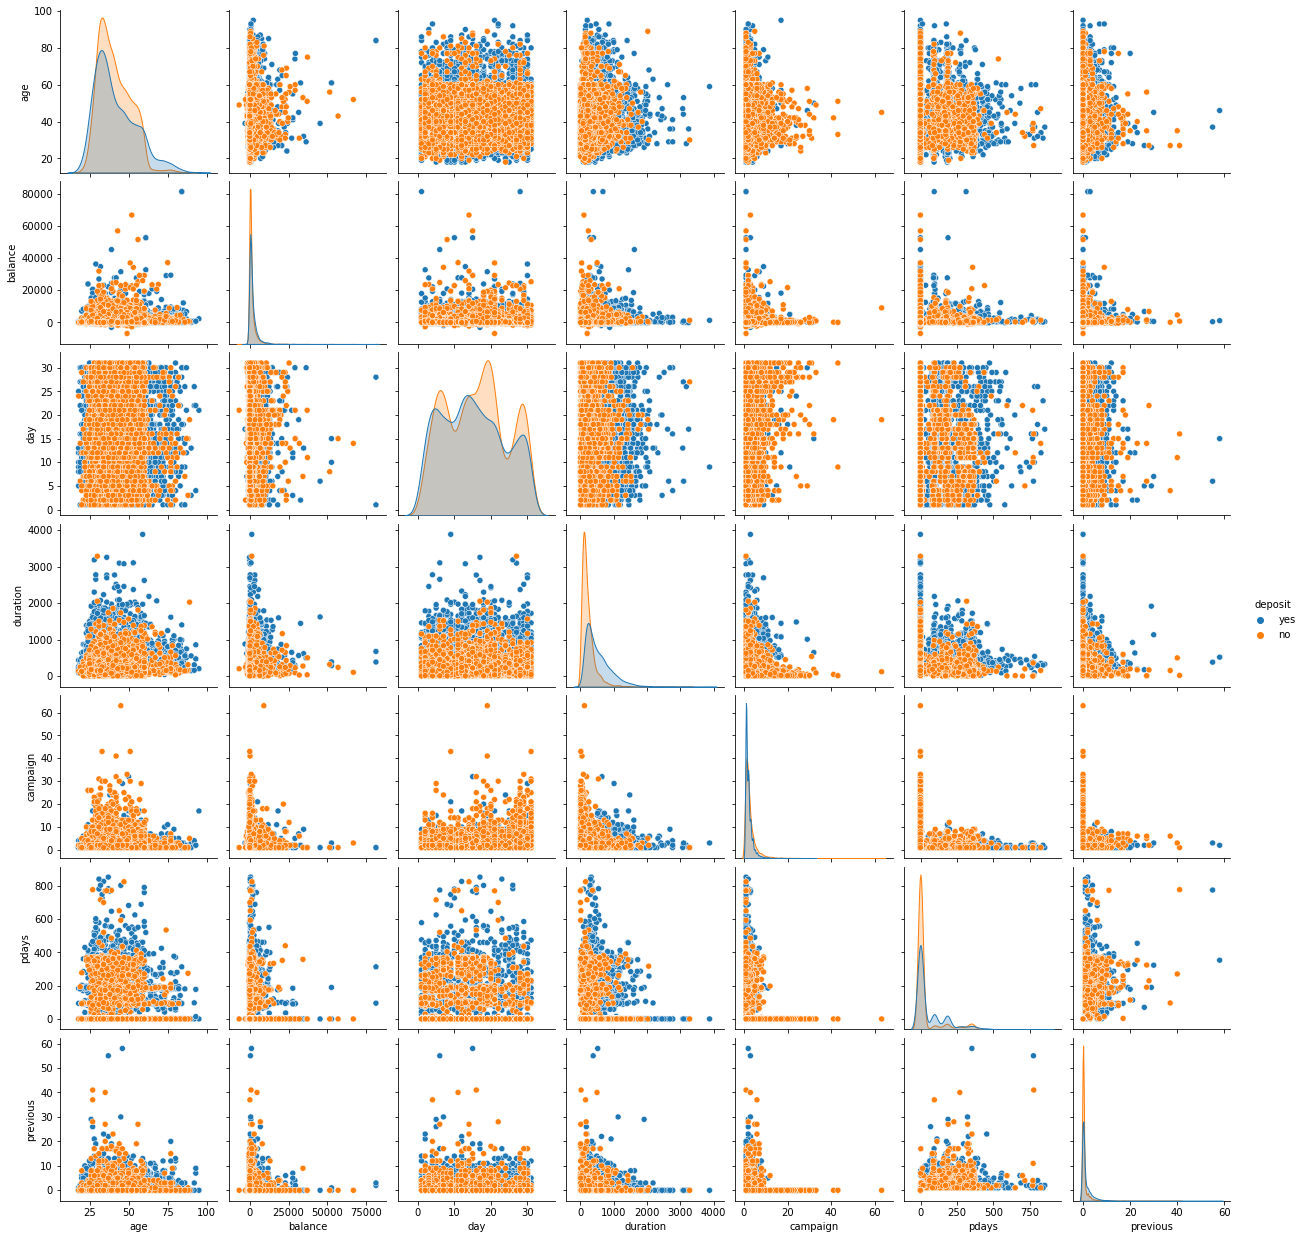

In [18]:
# pg = sns.PairGrid(dataset, hue='y')
# #pg.map(sns.scatterplot)

# pg.map_diag(sns.histplot)
# pg.map_offdiag(sns.scatterplot)

sns.pairplot(dataset, hue='deposit', height=2.5)
plt.show()

In [19]:
# as it is described for feature "duration", it should be removed from training model
X = dataset.drop(columns=['duration','deposit'], axis=1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown


In [157]:
Y = dataset['deposit']
type(Y), len(Y)

(pandas.core.series.Series, 11162)

### Feature preprocessing
link: https://jorisvandenbossche.github.io/blog/2017/11/20/categorical-encoder/

In [158]:
# converting yes/no to binary values

from sklearn.preprocessing import LabelEncoder

Y = LabelEncoder().fit_transform(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [53]:
type(Y), len(Y)

(numpy.ndarray, 11162)

In [35]:
X['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [59]:
# link: https://www.kite.com/python/answers/how-to-convert-between-month-name-and-month-number-in-python

def monthEncoder(month_name):
    '''
    input: month name in 3-letter format
    output: an integer value(1 to 12) that represents a month
    '''
    import datetime
    datetime_obj = datetime.datetime.strptime(month_name, '%b') # b for 3 letter month names and B for longer names
    month_number = datetime_obj.month
    return(month_number)

In [48]:
# converting mounth names to integers
X['month'] = X['month'].apply(lambda x: monthEncoder(x))
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,5,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,5,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,5,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,5,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,5,2,-1,0,unknown


In [65]:
def yesnoEncoler(yn):
    '''
    input: a Pandas Series of 'yes' and 'no' values
    output: a Pandas Series of integer values of (0 for no) or (1 for yes)
    '''
    return(yn.map({'yes':1, 'no':0}))

In [69]:
# converting 3 categories of yes/no values to 0/1 integer values
X['default'] = yesnoEncoler(X['default'])
X['housing'] = yesnoEncoler(X['housing'])
X['loan'] = yesnoEncoler(X['loan'])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,5,1,-1,0,unknown
1,56,admin.,married,secondary,0,45,0,0,unknown,5,5,1,-1,0,unknown
2,41,technician,married,secondary,0,1270,1,0,unknown,5,5,1,-1,0,unknown
3,55,services,married,secondary,0,2476,1,0,unknown,5,5,1,-1,0,unknown
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,5,2,-1,0,unknown


In [73]:
X.select_dtypes(exclude='int64').head()

,job,marital,education,contact,poutcome
0,admin.,married,secondary,unknown,unknown
1,admin.,married,secondary,unknown,unknown
2,technician,married,secondary,unknown,unknown
3,services,married,secondary,unknown,unknown
4,admin.,married,tertiary,unknown,unknown


In [87]:
unknowns = np.array([sum(X['job']=='unknown'), sum(X['education']=='unknown'), sum(X['contact']=='unknown'), sum(X['poutcome']=='unknown')])
unknowns

array([  70,  497, 2346, 8326])

In [91]:
unknowns/len(X) *100

array([ 0.62712775,  4.45260706, 21.01773876, 74.59236696])

In [90]:
# droping poutcome: considering the 75% unknown for poutcome, it does not look like a useful feature
X.drop(columns=['poutcome'], axis=1, inplace=True)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,5,1,-1,0
1,56,admin.,married,secondary,0,45,0,0,unknown,5,5,1,-1,0
2,41,technician,married,secondary,0,1270,1,0,unknown,5,5,1,-1,0
3,55,services,married,secondary,0,2476,1,0,unknown,5,5,1,-1,0
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,5,2,-1,0


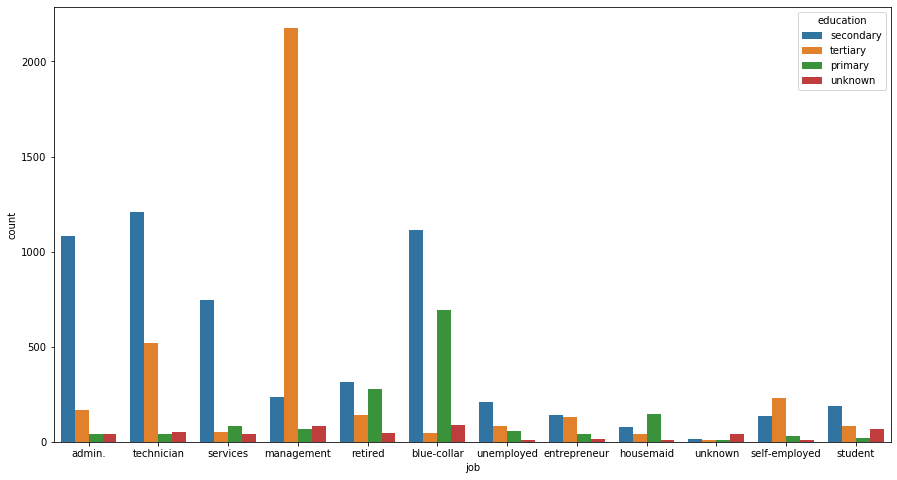

In [109]:
plt.figure(figsize=(15,8))
sns.countplot(x=X['job'], hue='education', data=X)
plt.show()

sns category plots : "strip", "swarm", "box", "violin",
    "boxen", "point", "bar", or "count"

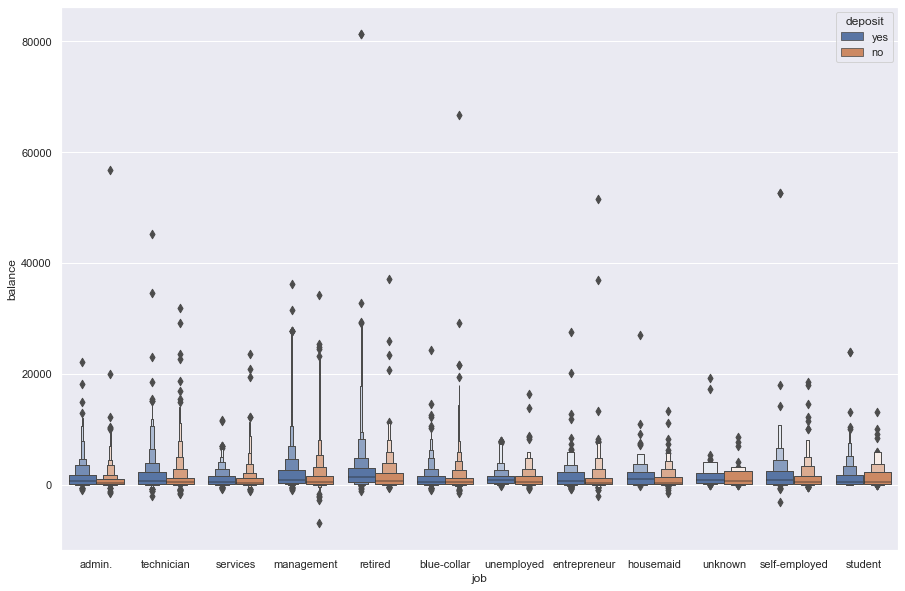

In [263]:
plt.figure(figsize=(15,10))
sns.boxenplot(data=dataset, x='job', y='balance', hue='deposit')
plt.show()

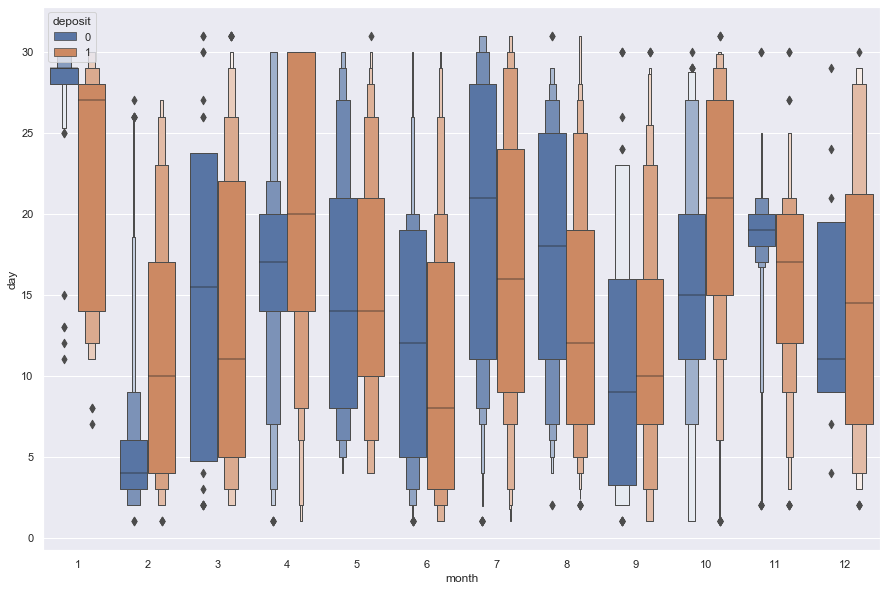

In [271]:
plt.figure(figsize=(15,10))
sns.boxenplot(data=hm, x='month', y='day', hue='deposit')
plt.show()

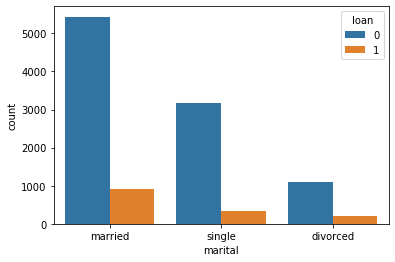

In [116]:
sns.countplot(x=X['marital'], hue='loan', data=X)
plt.show()

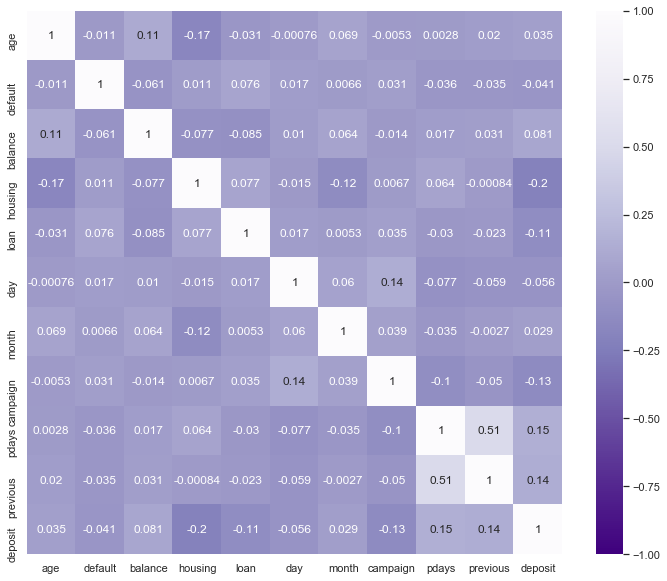

In [250]:
hm = X.select_dtypes(include='int64').assign(deposit=Y)
plt.figure(figsize=(12,10))
sns.heatmap(data=hm.corr(), vmin=-1, cmap='Purples_r', annot=True, cbar=True)
plt.show()

## Building Model

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support as scores
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=10)
y_pred = cross_val_predict(rf, X, Y, cv=k_fold)

ValueError: could not convert string to float: 'technician'

In [ ]:
#cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

